# Weather in Szeged 2006-2016

https://www.kaggle.com/budincsevity/szeged-weather

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("E:/Python Stuff/Weather in Szeged 2006-2016/weatherHistory.csv")
df_train.drop(columns=["Loud Cover","Precip Type","Apparent Temperature (C)"], inplace=True)
df_train.rename(columns={"Formatted Date":"Formatted_Date", "Temperature (C)":"Temperature","Wind Speed (km/h)":"Wind_Speed",\
                         "Wind Bearing (degrees)":"Wind_Bearing","Visibility (km)":"Visibility","Pressure (millibars)":"Pressure","Daily Summary":"Daily_Summary"}, inplace=True)

In [3]:
df_train.sample(5)

Formatted_Date        Summary  Temperature  Humidity  \
16100  2007-10-01 21:00:00.000 +0200  Partly Cloudy    16.850000      0.60   
65586  2013-07-30 18:00:00.000 +0200  Partly Cloudy    26.111111      0.47   
44476  2011-04-06 04:00:00.000 +0200          Clear     5.511111      0.95   
6709   2006-11-14 14:00:00.000 +0100  Mostly Cloudy    12.888889      0.68   
30925  2009-06-18 13:00:00.000 +0200  Mostly Cloudy    27.777778      0.27   

       Wind_Speed  Wind_Bearing  Visibility  Pressure  \
16100      7.5992          49.0      9.9820   1025.54   
65586     18.2091         310.0     11.2056   1014.24   
44476      6.5205         329.0      6.2951   1024.85   
6709      15.7297         239.0      9.9820   1015.98   
30925      9.6600         250.0      9.9820   1021.50   

                                           Daily_Summary  
16100                  Partly cloudy throughout the day.  
65586                  Partly cloudy throughout the day.  
44476  Partly cloudy starting in the morning continui...  
6709                   Mostly cloudy throughout the day.  
30925                         Partly cloudy until night.

In [4]:
df_train.describe()

Temperature      Humidity    Wind_Speed  Wind_Bearing    Visibility  \
count  96453.000000  96453.000000  96453.000000  96453.000000  96453.000000   
mean      11.932678      0.734899     10.810640    187.509232     10.347325   
std        9.551546      0.195473      6.913571    107.383428      4.192123   
min      -21.822222      0.000000      0.000000      0.000000      0.000000   
25%        4.688889      0.600000      5.828200    116.000000      8.339800   
50%       12.000000      0.780000      9.965900    180.000000     10.046400   
75%       18.838889      0.890000     14.135800    290.000000     14.812000   
max       39.905556      1.000000     63.852600    359.000000     16.100000   

           Pressure  
count  96453.000000  
mean    1003.235956  
std      116.969906  
min        0.000000  
25%     1011.900000  
50%     1016.450000  
75%     1021.090000  
max     1046.380000

In [5]:
df_train["Formatted_Date"] = pd.to_datetime(df_train["Formatted_Date"])

In [6]:
df_train["year"] = df_train["Formatted_Date"].apply(lambda x: x.year)
df_train["month"] = df_train["Formatted_Date"].apply(lambda x: x.month)
df_train["day"] = df_train["Formatted_Date"].apply(lambda x: x.day)
df_train["hour"] = df_train["Formatted_Date"].apply(lambda x: x.hour)

In [7]:
cat_col = ["year","month","day","hour","Summary","Daily_Summary"]
for col in cat_col:
    le = LabelEncoder()
    df_train["{}_encoded".format(col)] = le.fit_transform(df_train[col])

In [8]:
df_train.head()

Formatted_Date        Summary  Temperature  Humidity  \
0  2006-04-01 00:00:00+02:00  Partly Cloudy     9.472222      0.89   
1  2006-04-01 01:00:00+02:00  Partly Cloudy     9.355556      0.86   
2  2006-04-01 02:00:00+02:00  Mostly Cloudy     9.377778      0.89   
3  2006-04-01 03:00:00+02:00  Partly Cloudy     8.288889      0.83   
4  2006-04-01 04:00:00+02:00  Mostly Cloudy     8.755556      0.83   

   Wind_Speed  Wind_Bearing  Visibility  Pressure  \
0     14.1197         251.0     15.8263   1015.13   
1     14.2646         259.0     15.8263   1015.63   
2      3.9284         204.0     14.9569   1015.94   
3     14.1036         269.0     15.8263   1016.41   
4     11.0446         259.0     15.8263   1016.51   

                       Daily_Summary  year  month  day  hour  year_encoded  \
0  Partly cloudy throughout the day.  2006      4    1     0             0   
1  Partly cloudy throughout the day.  2006      4    1     1             0   
2  Partly cloudy throughout the day.  2006      4    1     2             0   
3  Partly cloudy throughout the day.  2006      4    1     3             0   
4  Partly cloudy throughout the day.  2006      4    1     4             0   

   month_encoded  day_encoded  hour_encoded  Summary_encoded  \
0              3            0             0               19   
1              3            0             1               19   
2              3            0             2               17   
3              3            0             3               19   
4              3            0             4               17   

   Daily_Summary_encoded  
0                    197  
1                    197  
2                    197  
3                    197  
4                    197

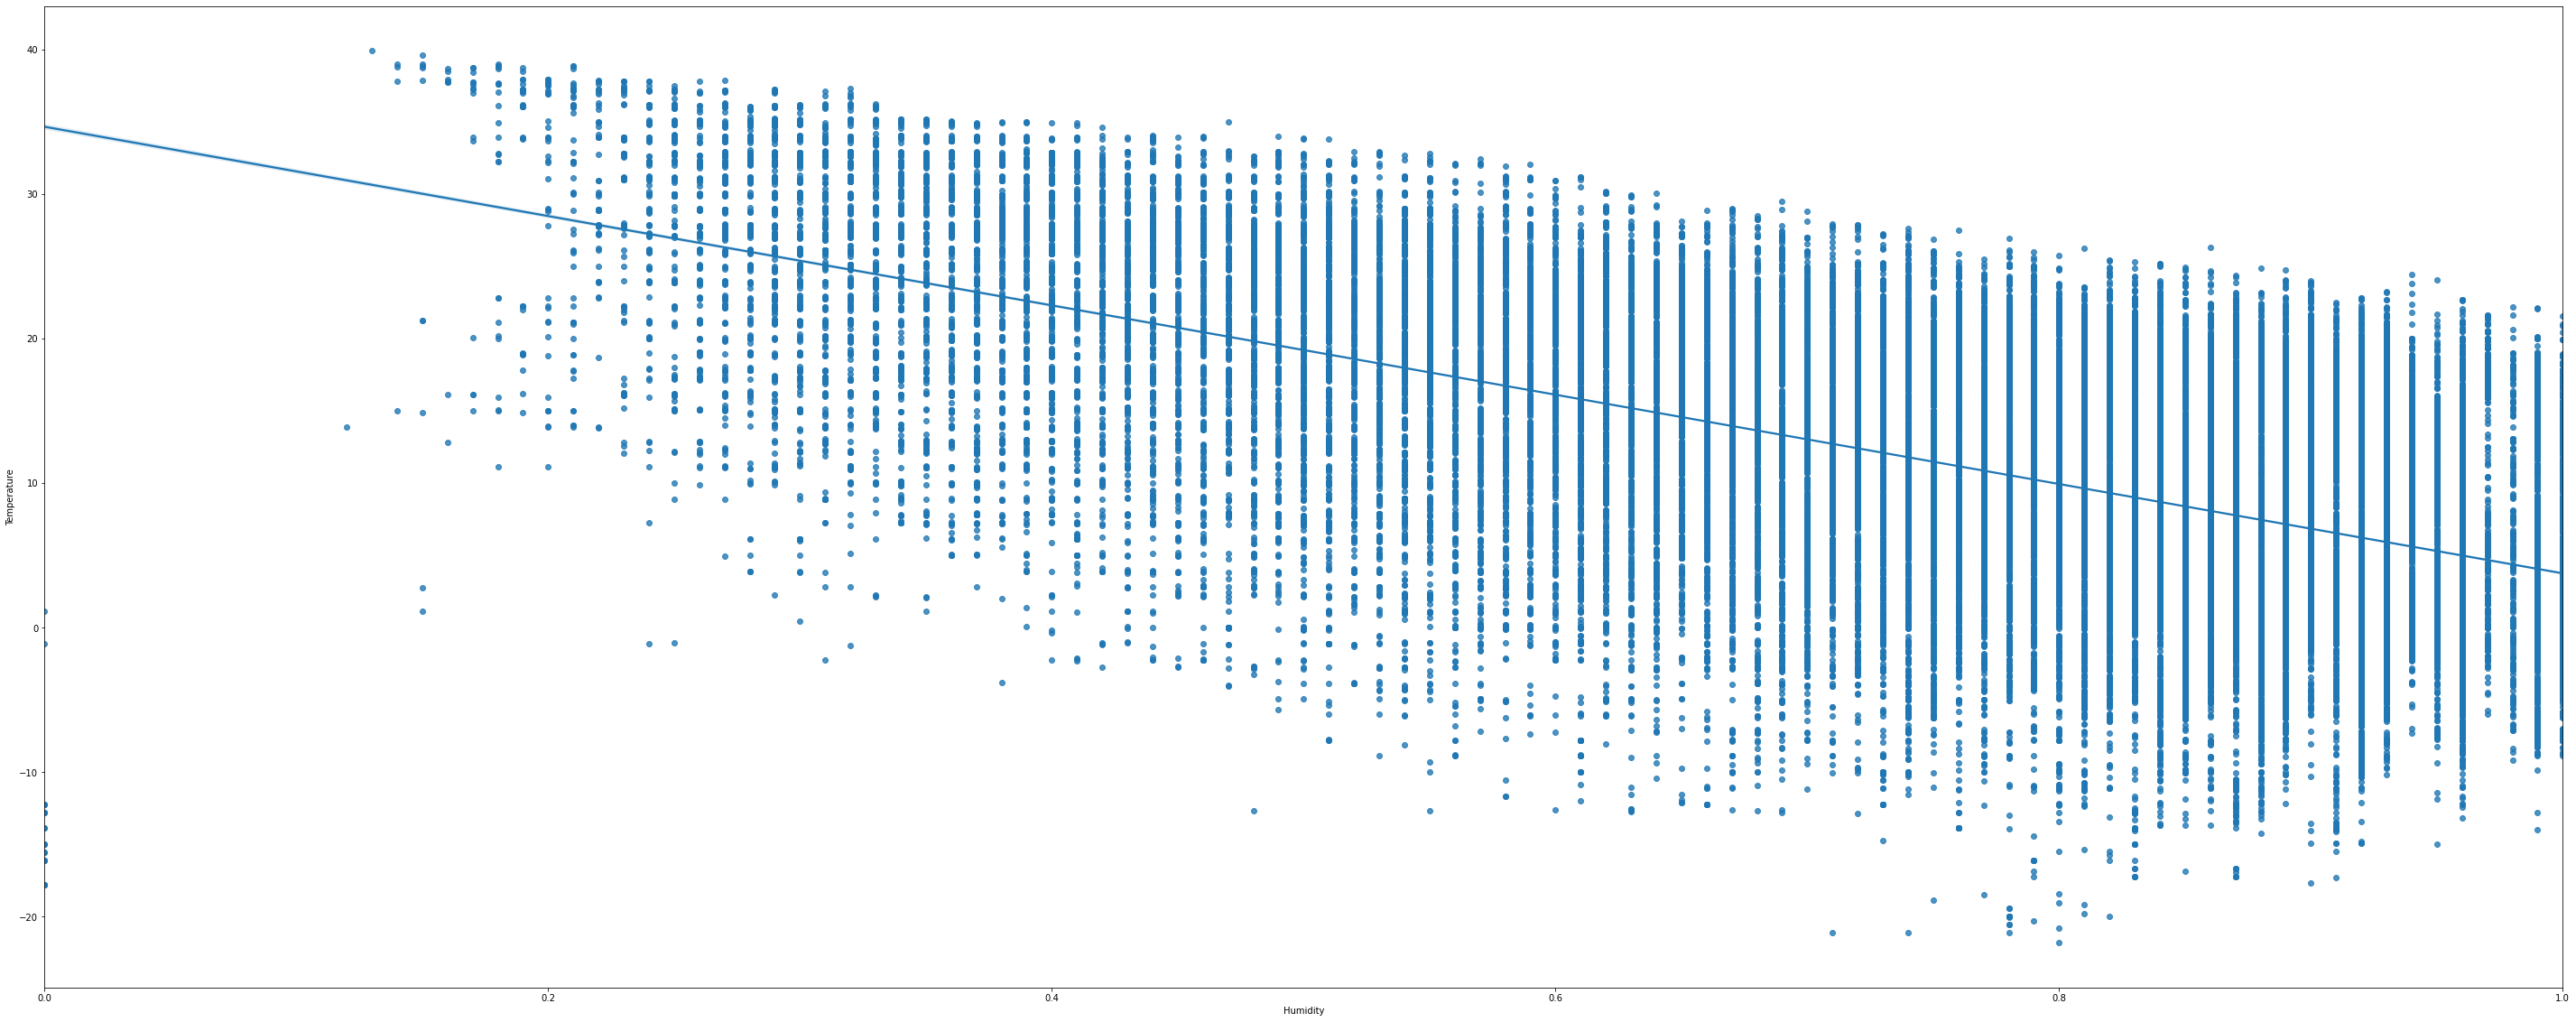

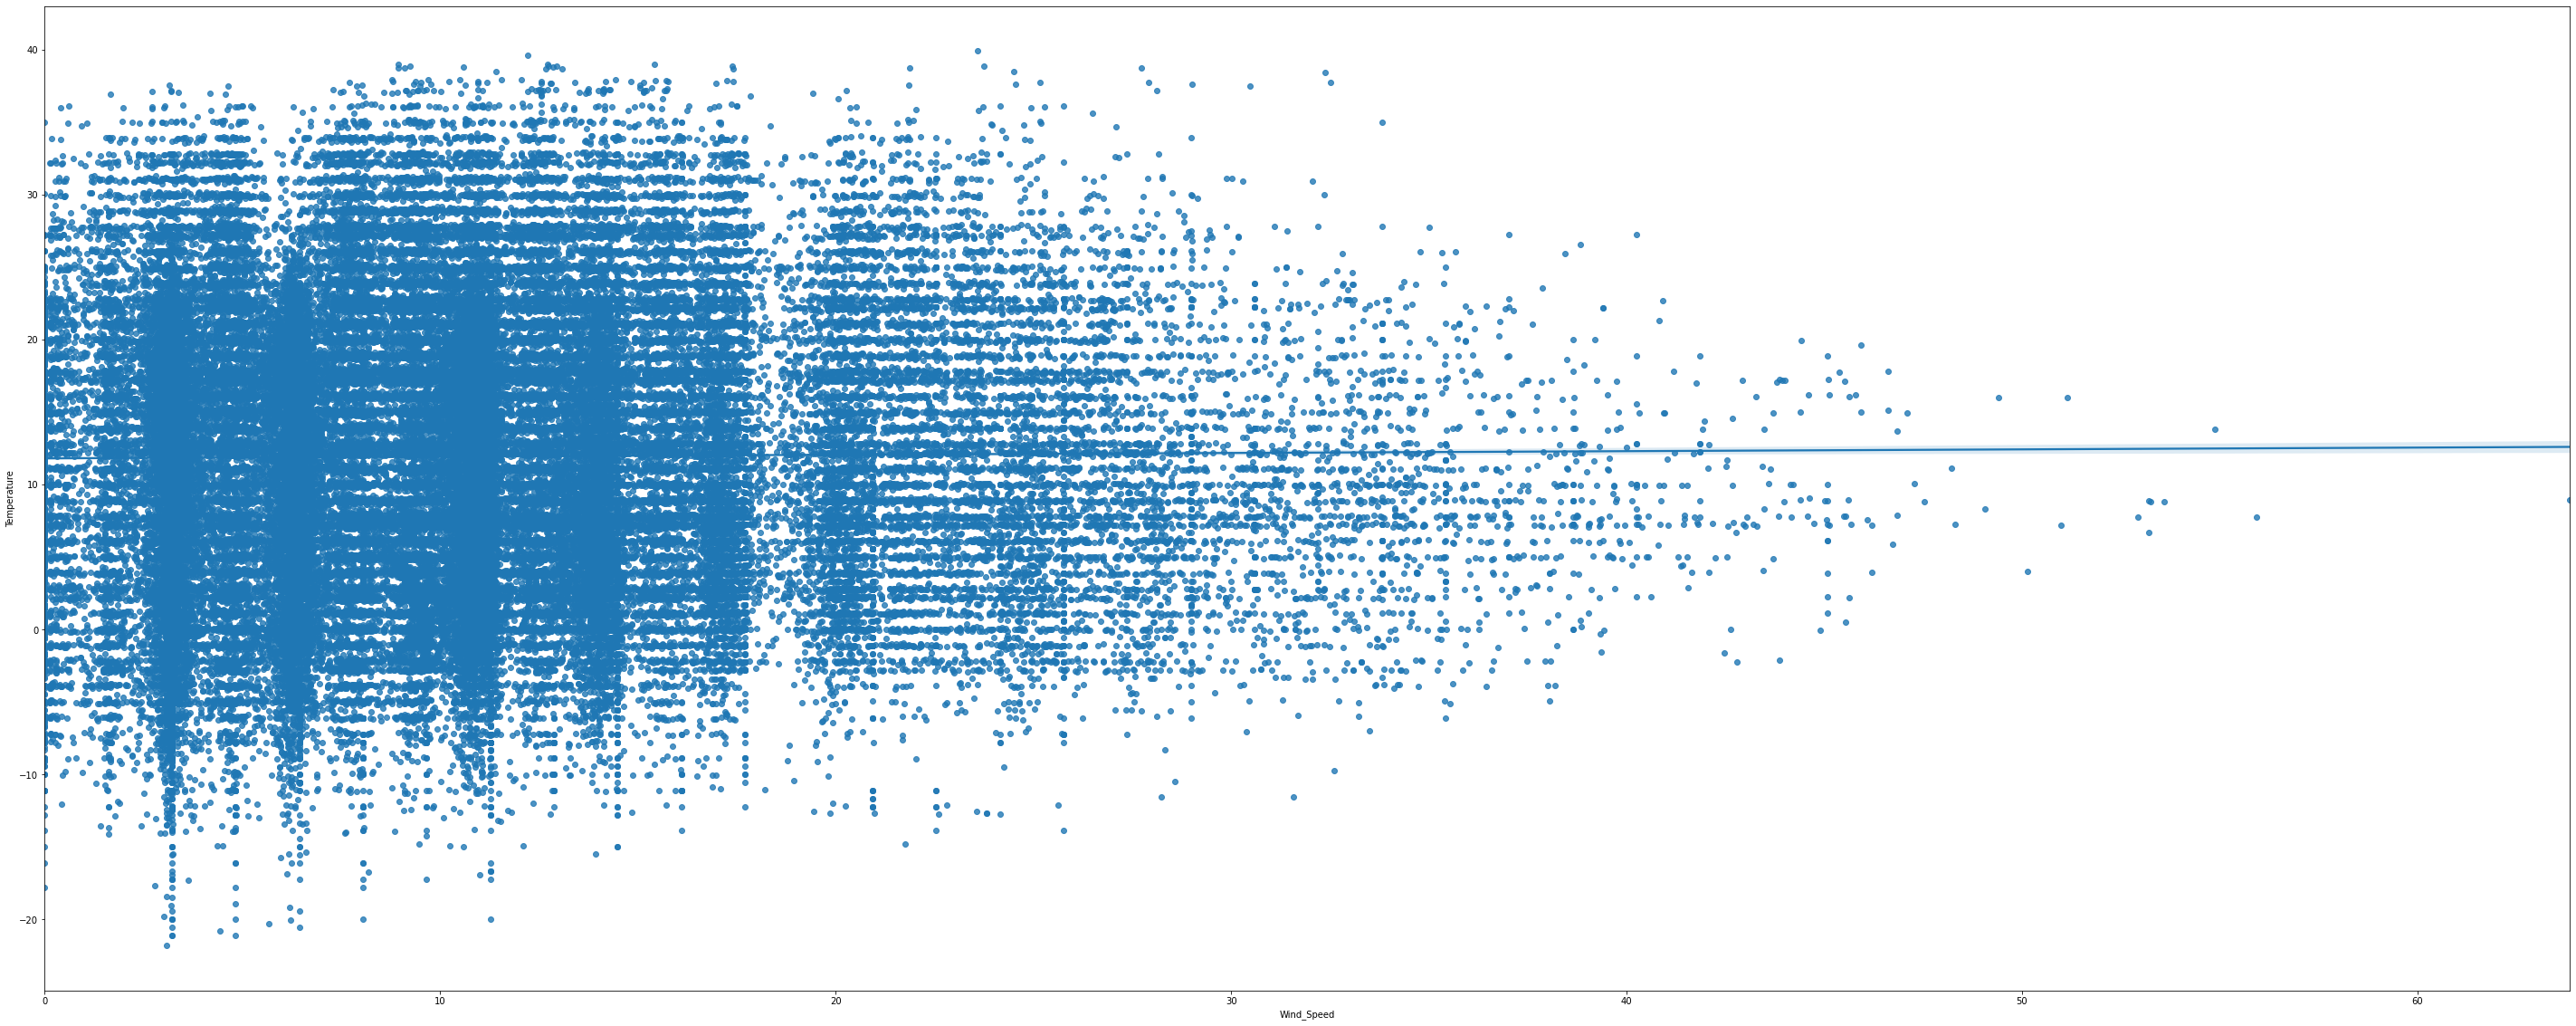

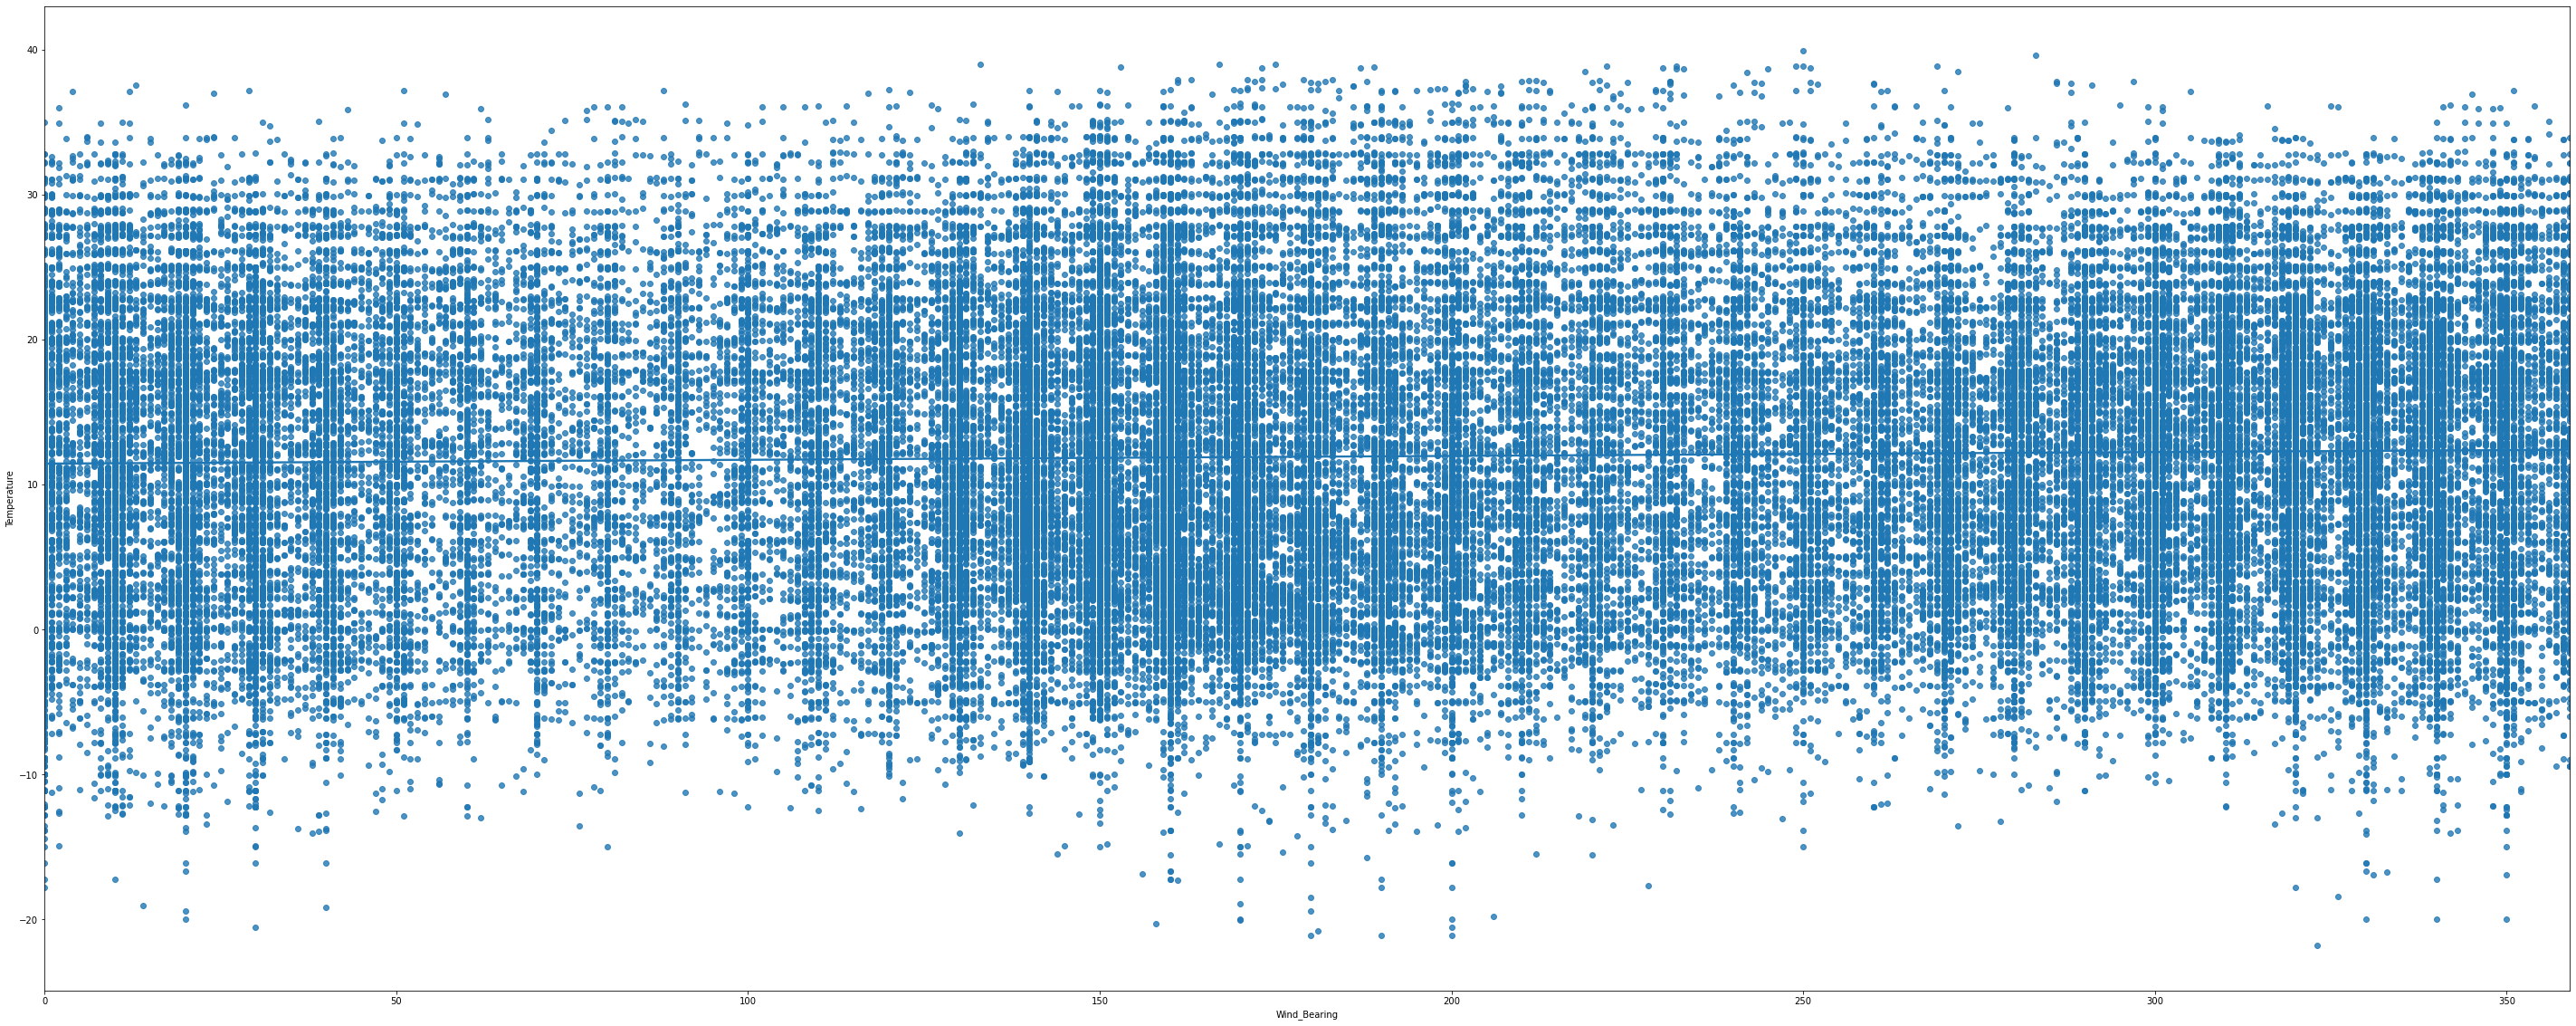

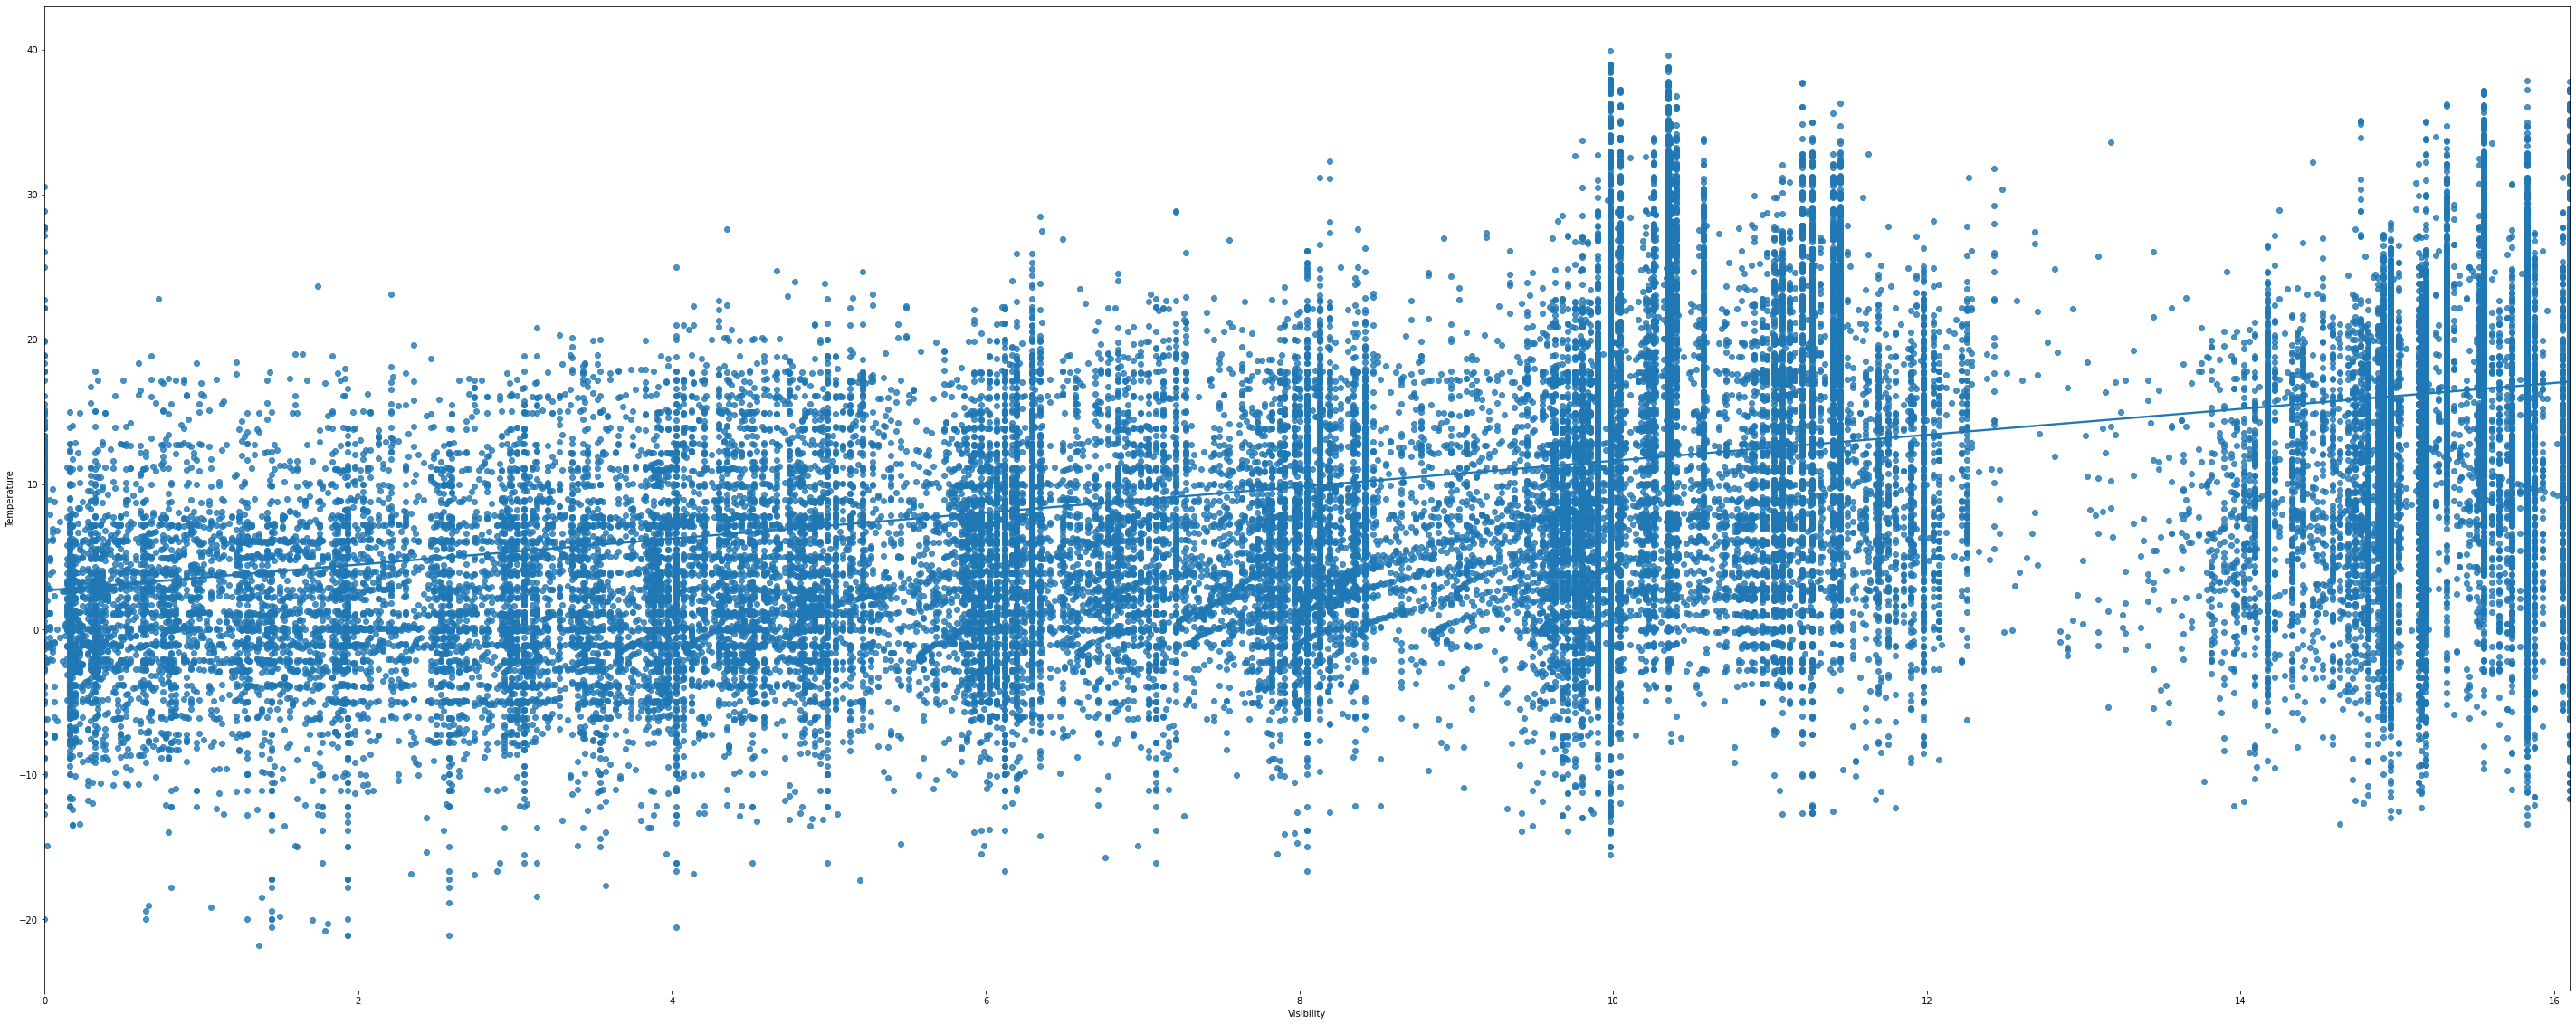

In [9]:
for col in ["Humidity","Wind_Speed","Wind_Bearing","Visibility"]:
    plt.figure(figsize=(50, 20))
    sns.regplot(x=col, y="Temperature", data=df_train)

<AxesSubplot:xlabel='Pressure', ylabel='Temperature'>

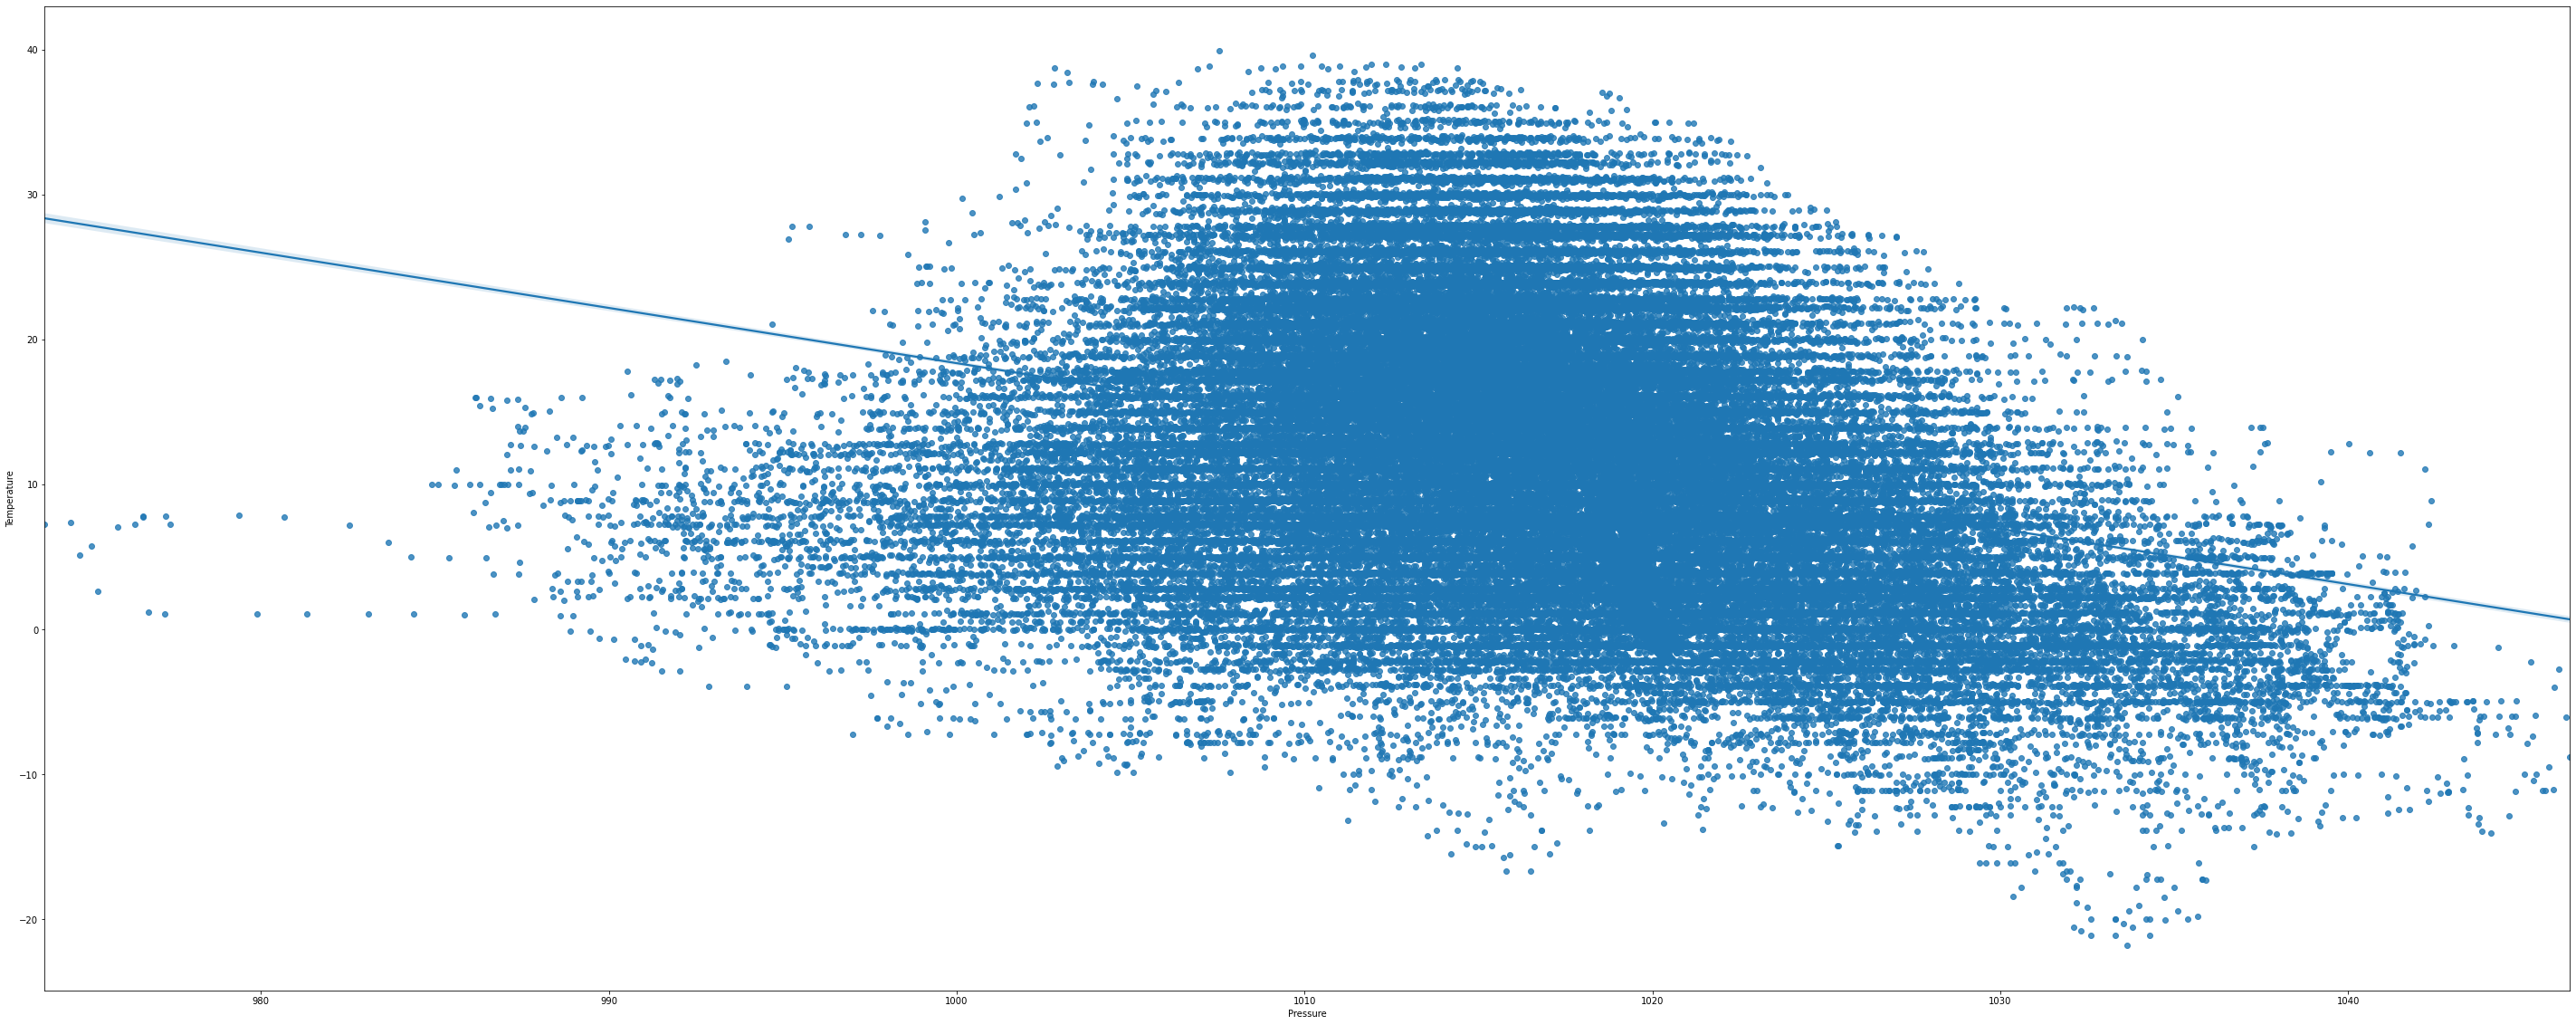

In [10]:
plt.figure(figsize=(50, 20))
sns.regplot(x="Pressure", y="Temperature", data=df_train[df_train["Pressure"]>0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


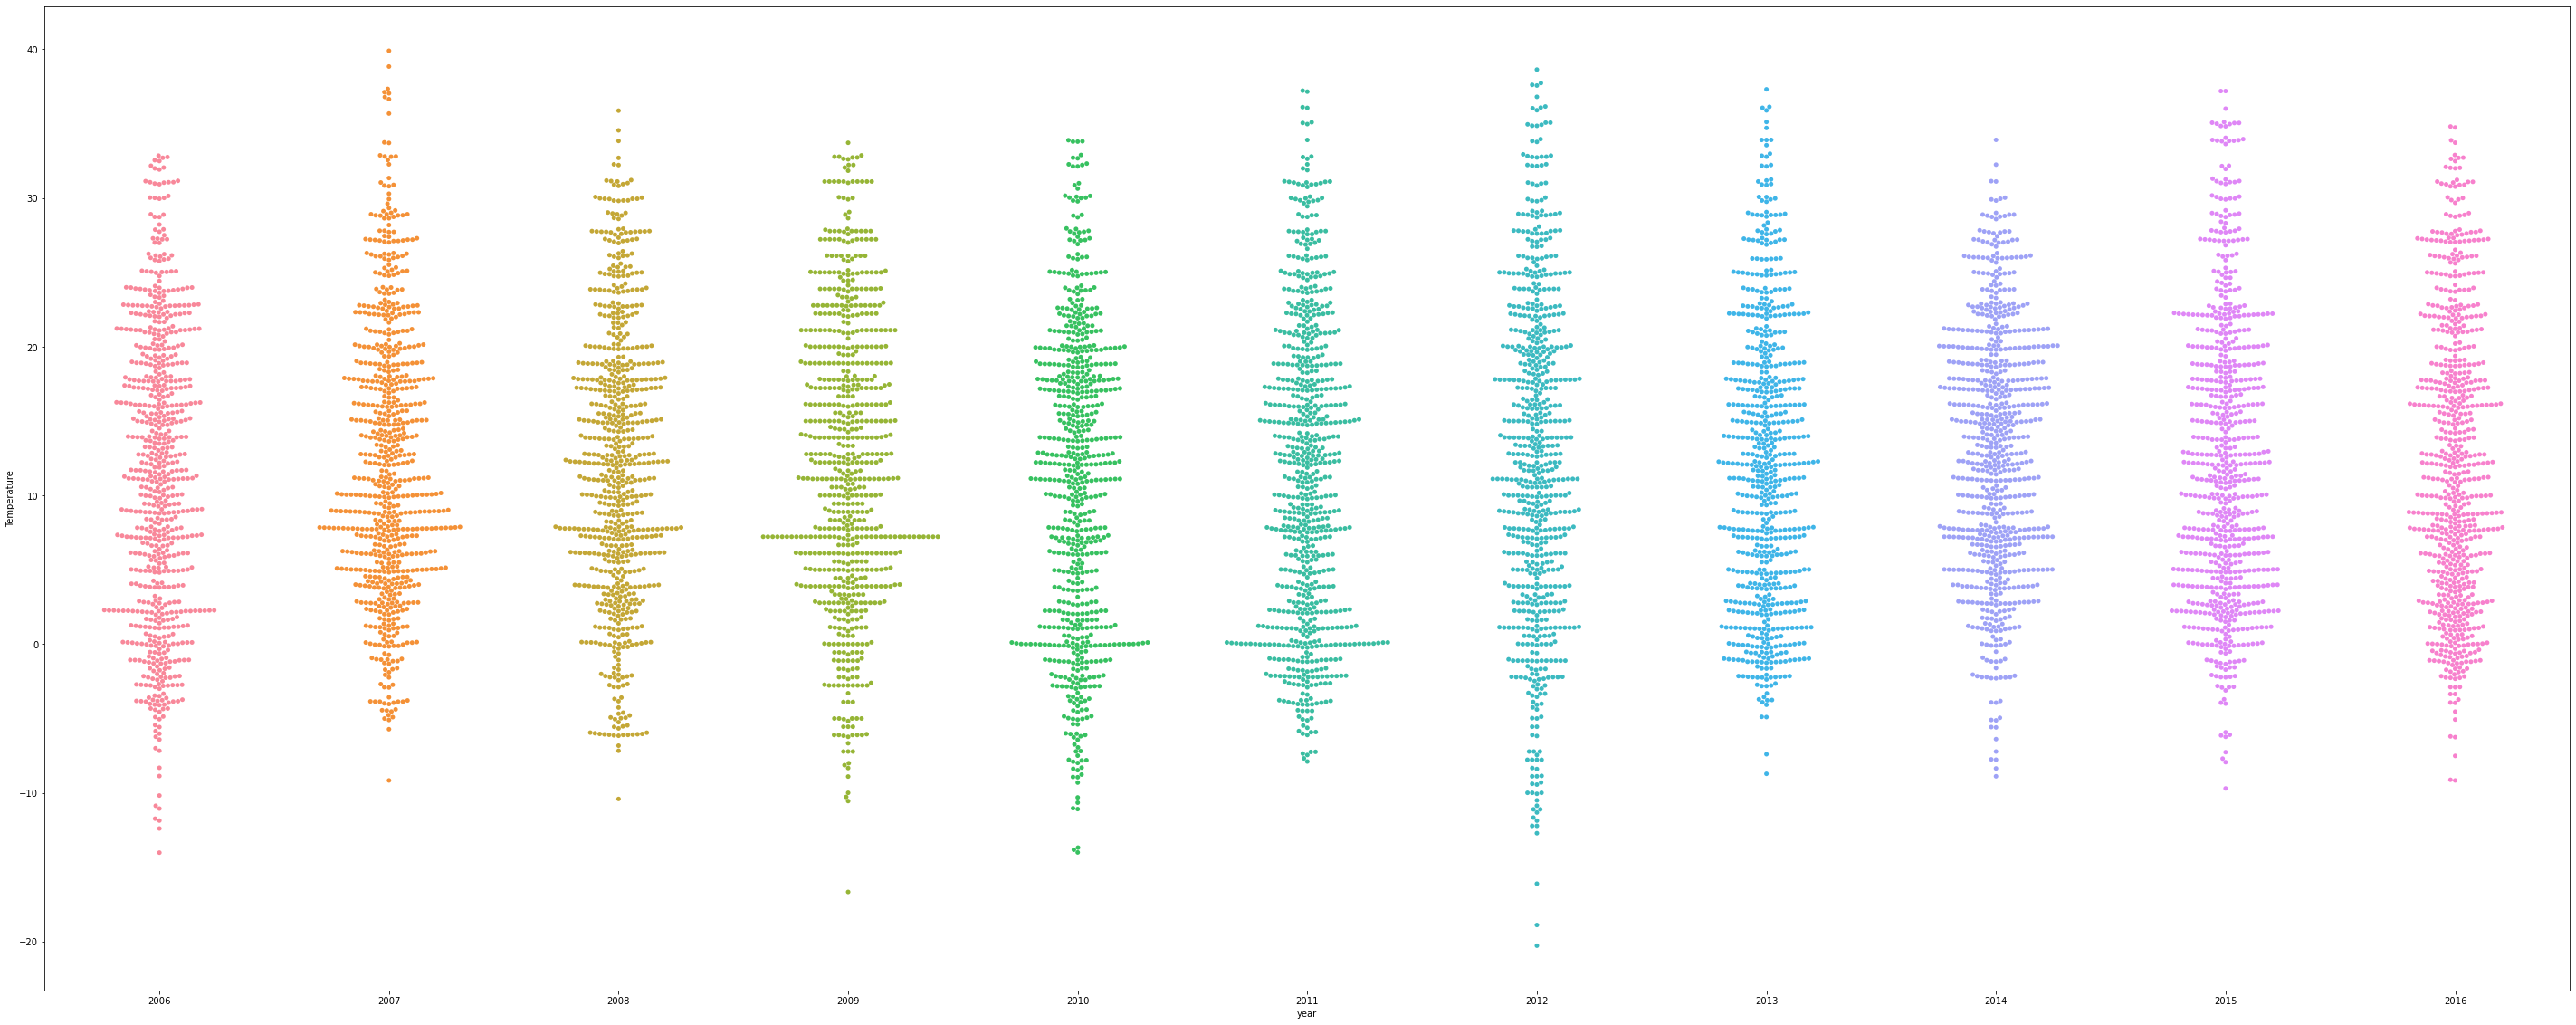

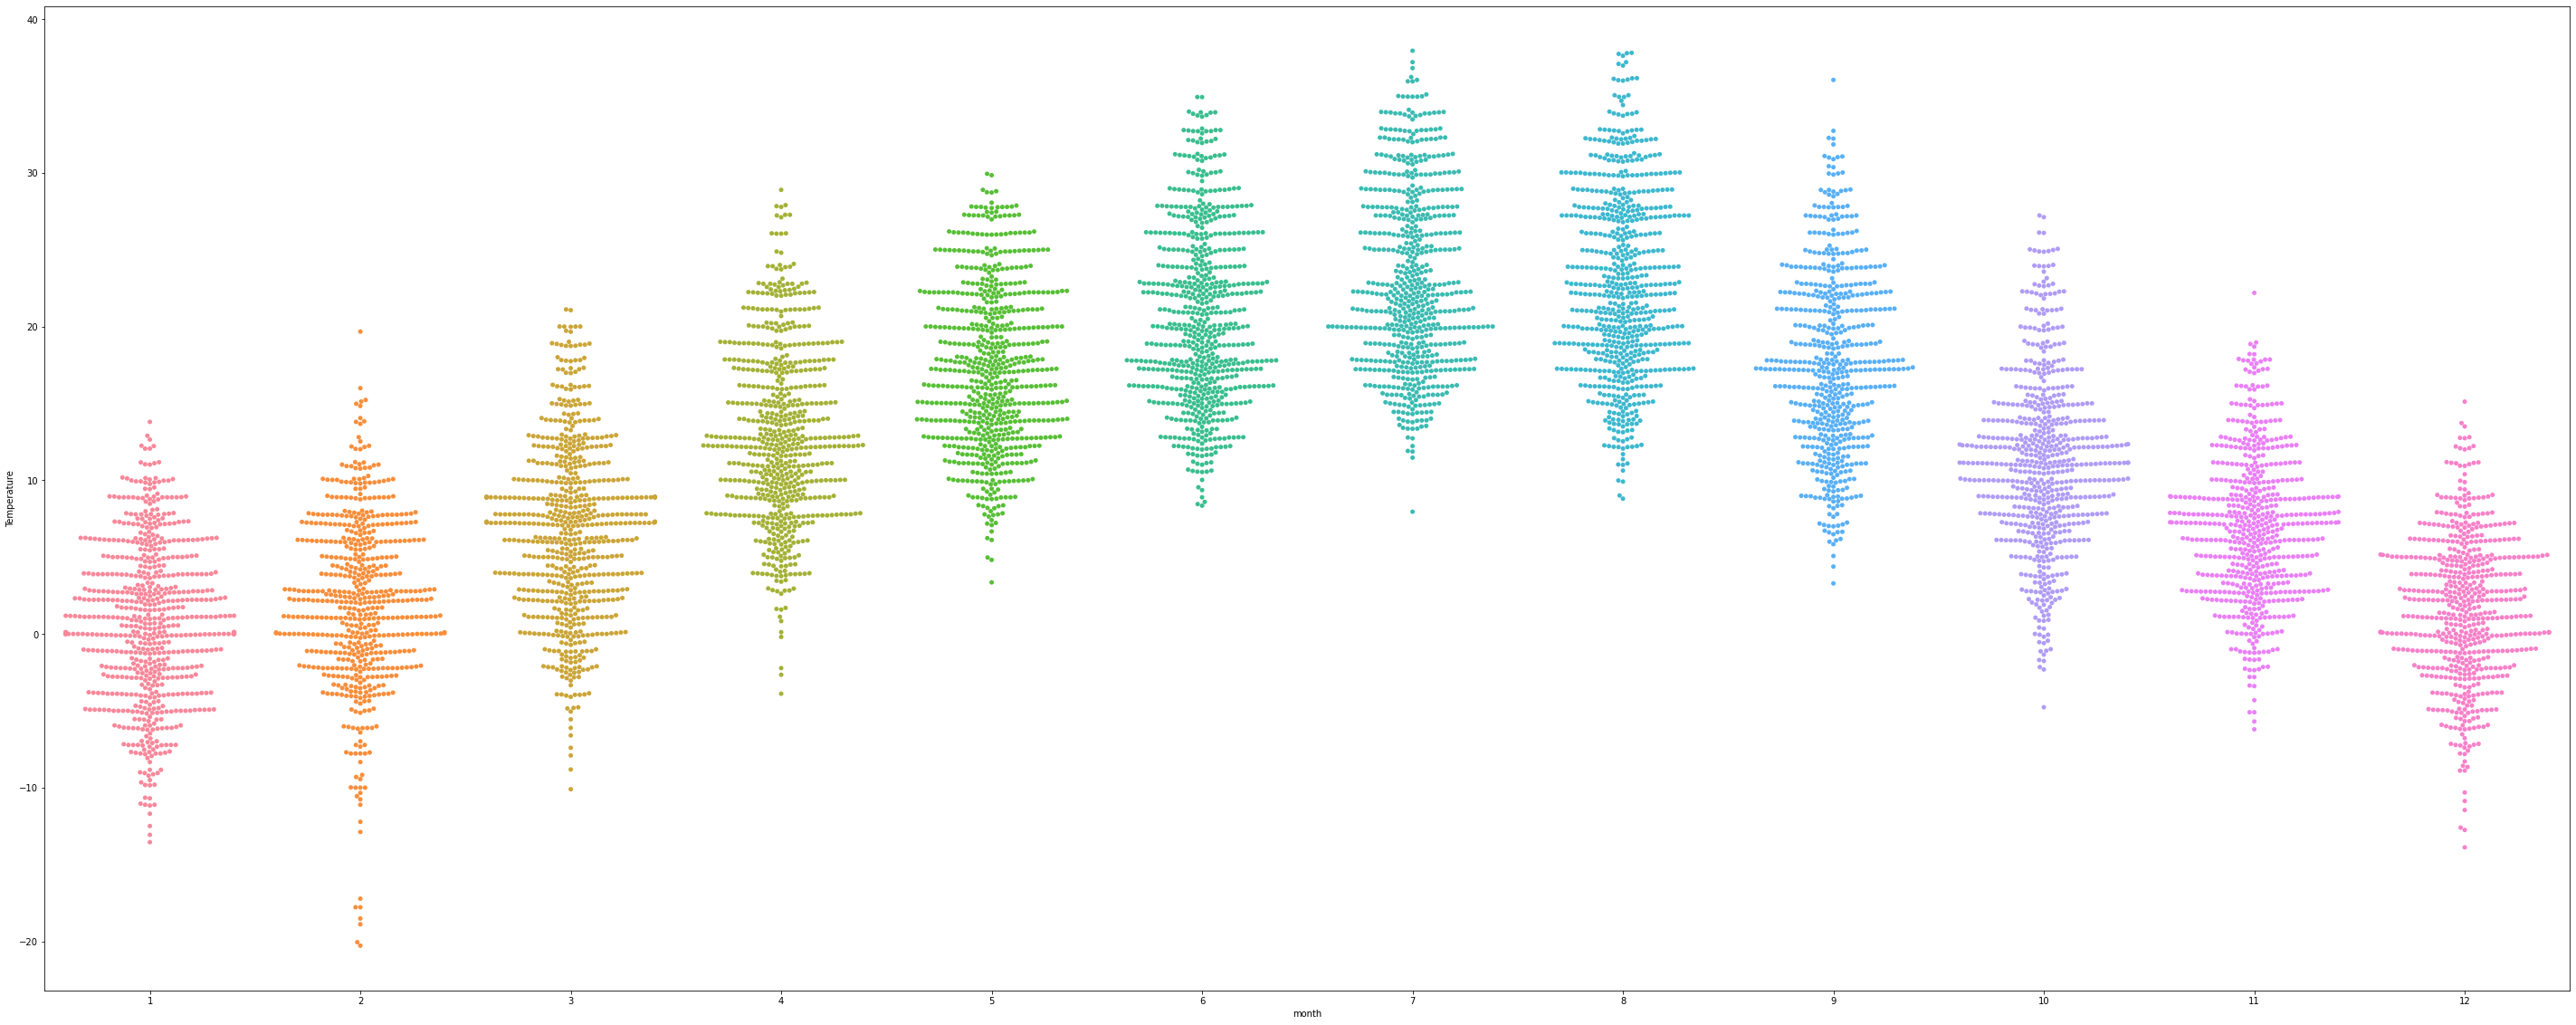

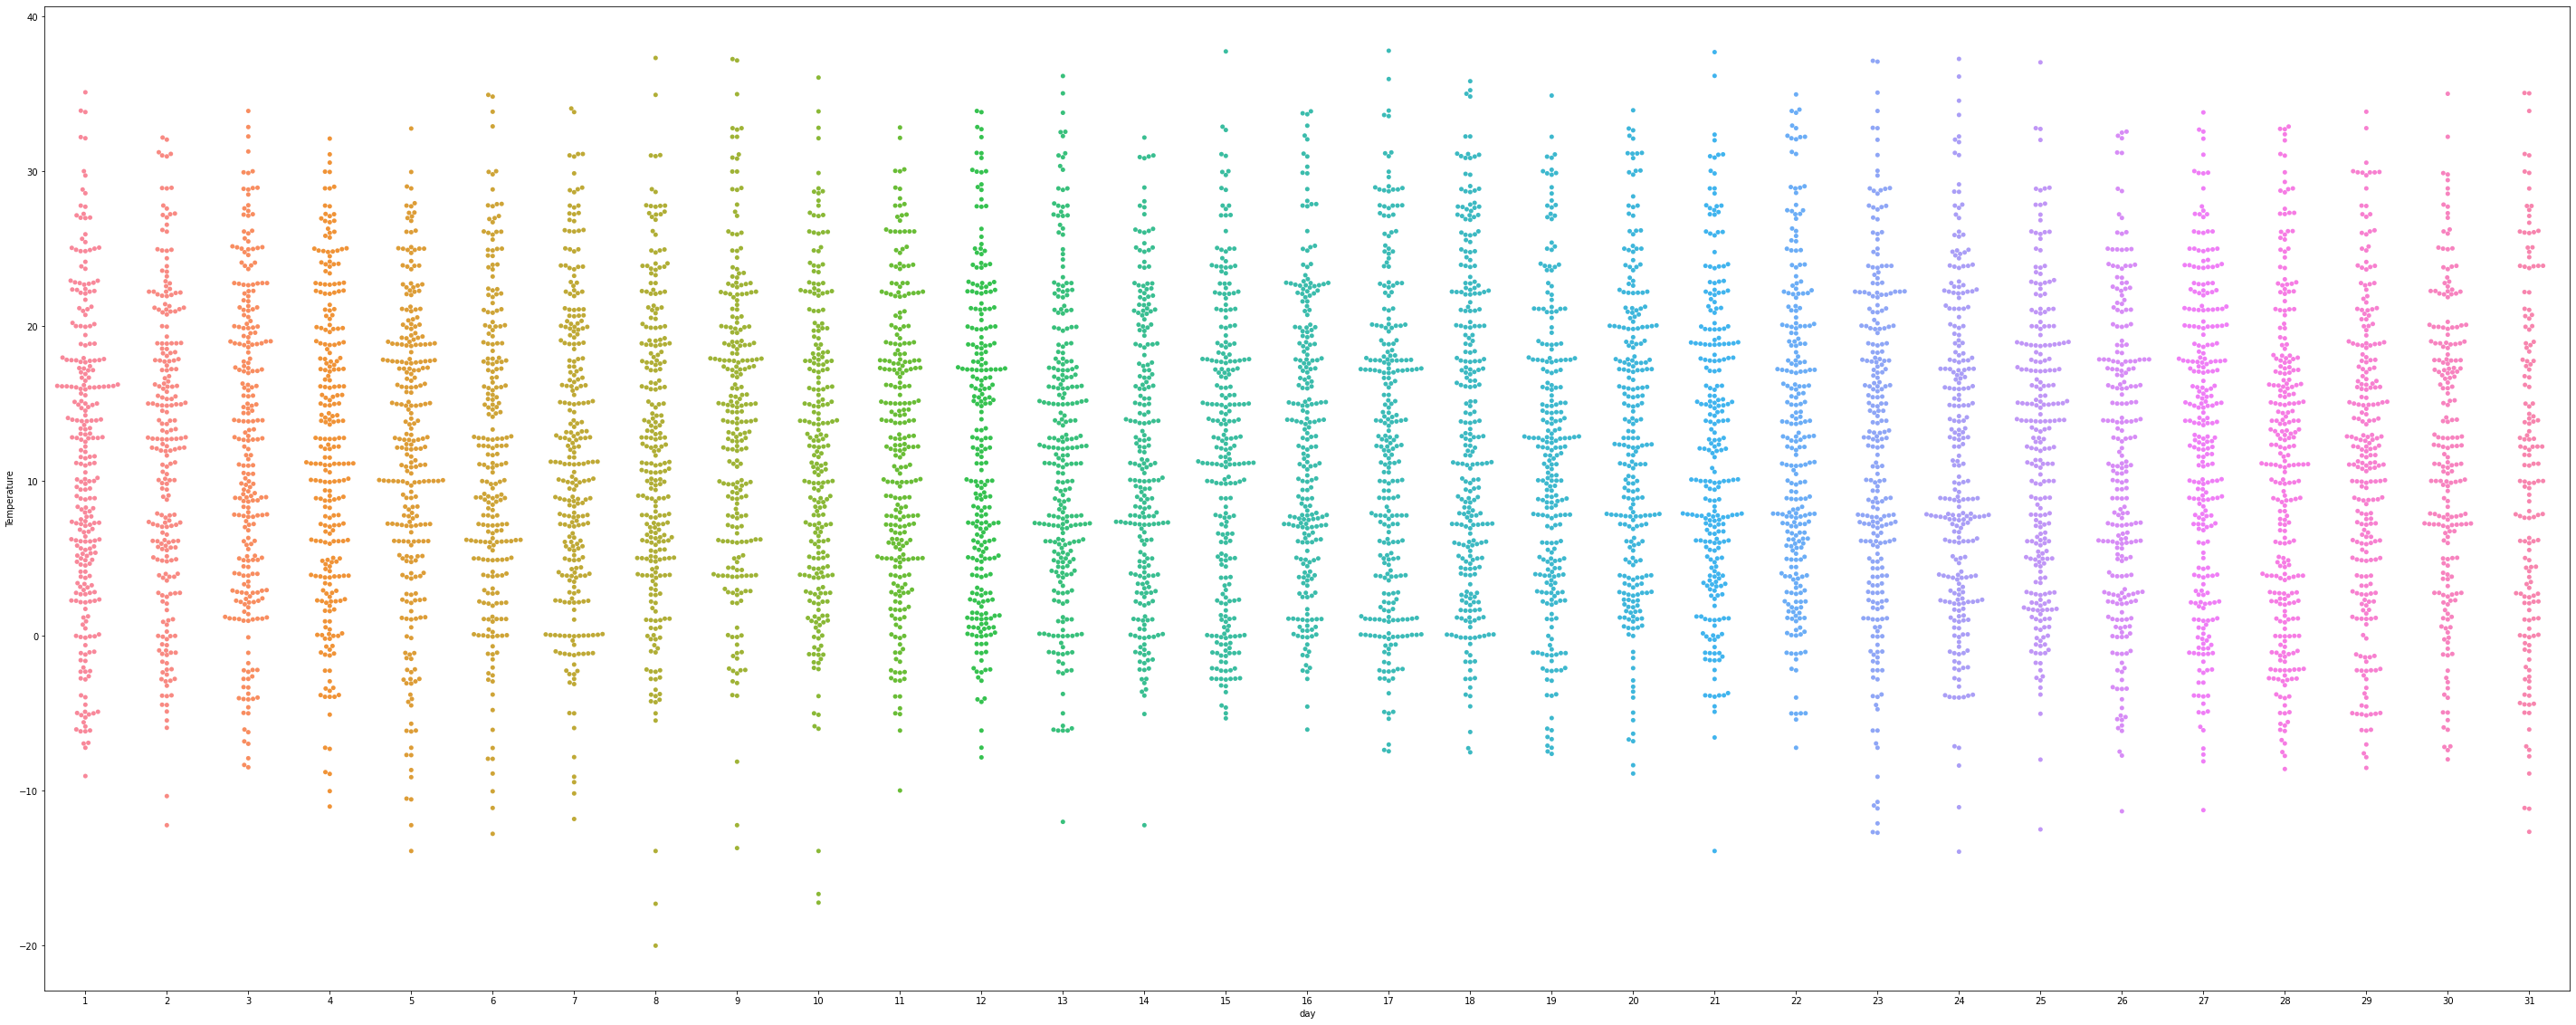

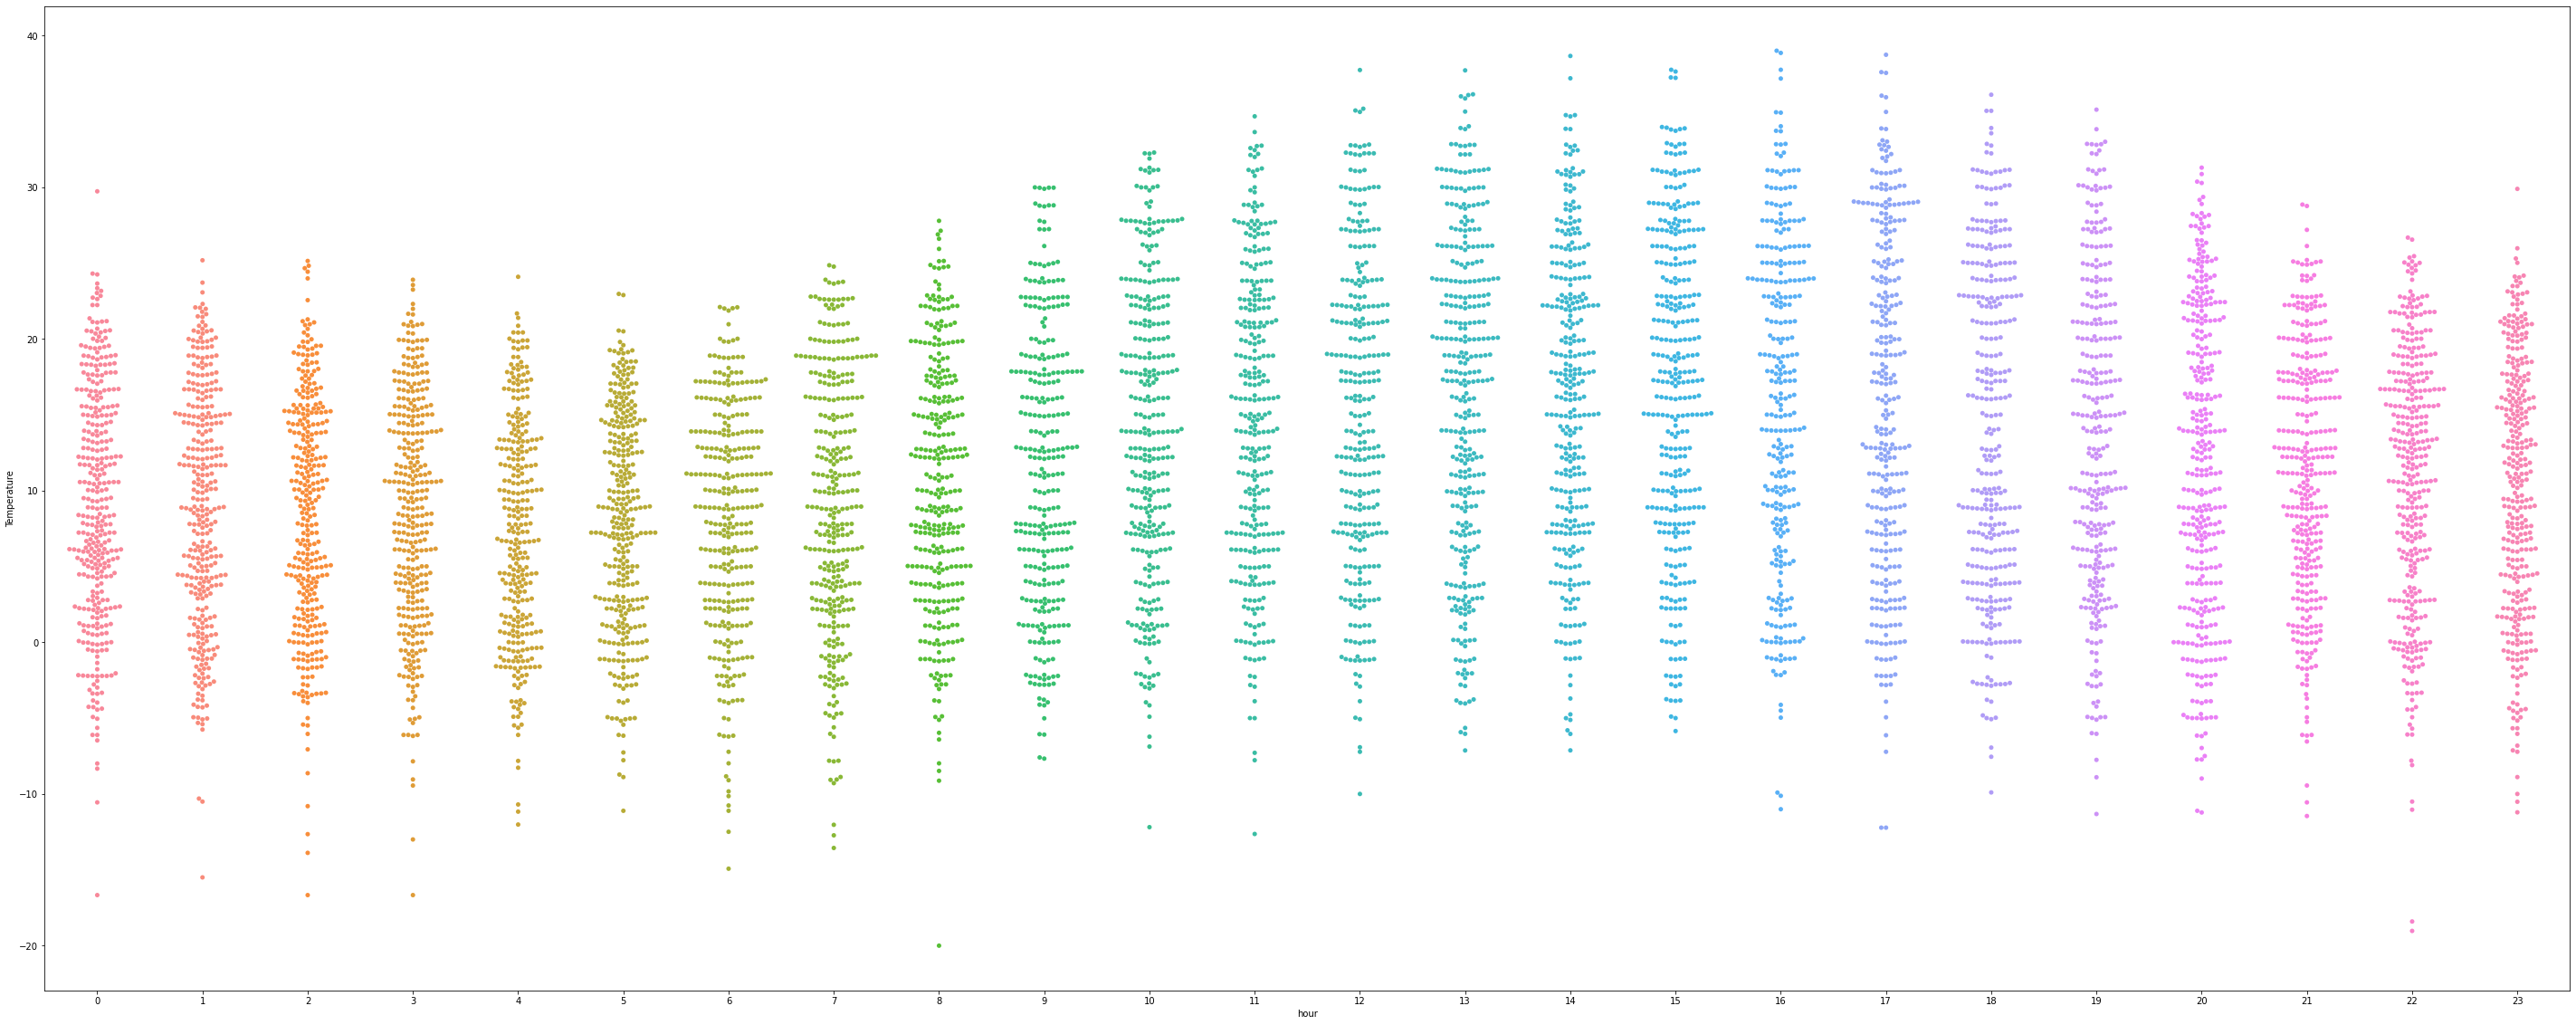

In [11]:
for col in ["year","month","day","hour"]:
    plt.figure(figsize=(50, 20))
    sns.swarmplot(x=df_train[col].sample(8000), y=df_train['Temperature'])

In [12]:
X = df_train[["Humidity","Wind_Speed","Wind_Bearing","Visibility","Pressure","year_encoded","month_encoded","day_encoded","hour_encoded","Summary_encoded","Daily_Summary_encoded"]]
y = df_train["Temperature"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
categorical_feature = ["year_encoded","month_encoded","day_encoded","hour_encoded","Summary_encoded","Daily_Summary_encoded"]

In [15]:
train_data = lgb.Dataset(data=X_train, label=y_train, free_raw_data=False, categorical_feature=categorical_feature)
test_data = lgb.Dataset(data=X_test, label=y_test, free_raw_data=False, categorical_feature=categorical_feature)

In [16]:
params = {'objective':'regression', "metric":"rmse", "learning_rate":0.05, "num_rounds":100000, "num_leaves":15}
model = lgb.train(train_set=train_data,
                 params=params,
                 valid_sets=[train_data, test_data],
                 verbose_eval=20000
                )

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 72339, number of used features: 11
[LightGBM] [Info] Start training from score 11.954869
[20000]	training's rmse: 0.30281	valid_1's rmse: 0.959802
[40000]	training's rmse: 0.120799	valid_1's rmse: 0.934019
[60000]	training's rmse: 0.0528164	valid_1's rmse: 0.928532
[80000]	training's rmse: 0.0242027	valid_1's rmse: 0.926832
[100000]	training's rmse: 0.0114937	valid_1's rmse: 0.926276


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

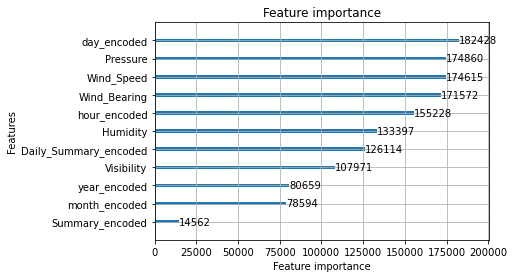

In [17]:
lgb.plot_importance(model)

In [18]:
y_test_hat = model.predict(X_test)

In [19]:
y_test_hat[0:10]

array([27.07211012,  8.90729117, 14.57205578,  0.74322424,  0.32838728,
        3.12526414, 27.15422602, 16.68236268, 10.31945054,  9.28690587])

In [20]:
y_test.head(10)

87206    28.122222
33421    10.000000
6807     14.400000
37340     1.016667
3016     -0.122222
54286     2.022222
27660    26.111111
6108     16.016667
95359     9.888889
85743     8.383333
Name: Temperature, dtype: float64